In [287]:
import pandas as pd
from datetime import datetime
from pandas_datareader import data as pdr
def get_data(symbol):
 
 dat = pdr.get_data_yahoo(symbol,'2010-01-01',interval='m')['Adj Close']
 return dat

In [288]:
#list of BSE 30 securities.
bse_securities=["532187.BO","TATASTEELPP.BO","SBIN.BO","ONGC.BO","POWERGRID.BO","SUNPHARMA.BO","HCLTECH.BO","BHARTIARTL.BO",
                "AXISBANK.BO","ICICIBANK.BO","ITC.BO","BAJFINANCE.BO","MARUTI.BO","LT.BO","M&M.BO","HDFCBANK.BO","INFY.BO",
                "HEROMOTOCO.BO","TITAN.BO","NTPC.BO","HDFC.BO","KOTAKBANK.BO","BAJAJ-AUTO.BO","ULTRACEMCO.BO","RELIANCE.BO",
                "TECHM.BO","NESTLEIND.BO","TCS.BO","HINDUNILVR.BO","ASIANPAINT.BO"]

In [289]:
# Get prices of BSE 30 stocks
prices_dict={}
for i in bse_securities:
    prices=get_data(i)
    returns[i] = np.log(prices/ prices.shift(1))
    prices_dict[i] = prices

In [290]:
# return dictionary of BSE 30 stocks
returns_dict={}
for i in bse_securities:
    prices=prices_dict[i]
    returns_dict[i]=np.log(prices/ prices.shift(1))

Date
2009-12-31         NaN
2010-01-31    0.039457
2010-02-28    0.025686
2010-03-31   -0.019137
2010-04-30   -0.031833
                ...   
2019-10-31   -0.098265
2019-11-30    0.051554
2019-12-31   -0.038679
2020-01-31    0.038631
2020-02-20    0.000000
Name: Adj Close, Length: 123, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x129309610>,
      dtype=object)

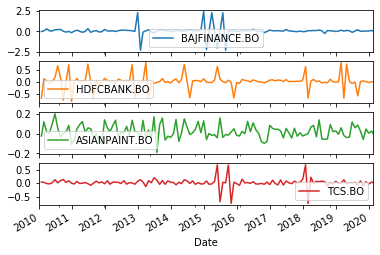

In [291]:
import matplotlib.pyplot as plt 
df = pd.DataFrame(returns_dict)
df[['BAJFINANCE.BO','HDFCBANK.BO','ASIANPAINT.BO','TCS.BO']].plot(subplots=True)

(42.0, -2.0)

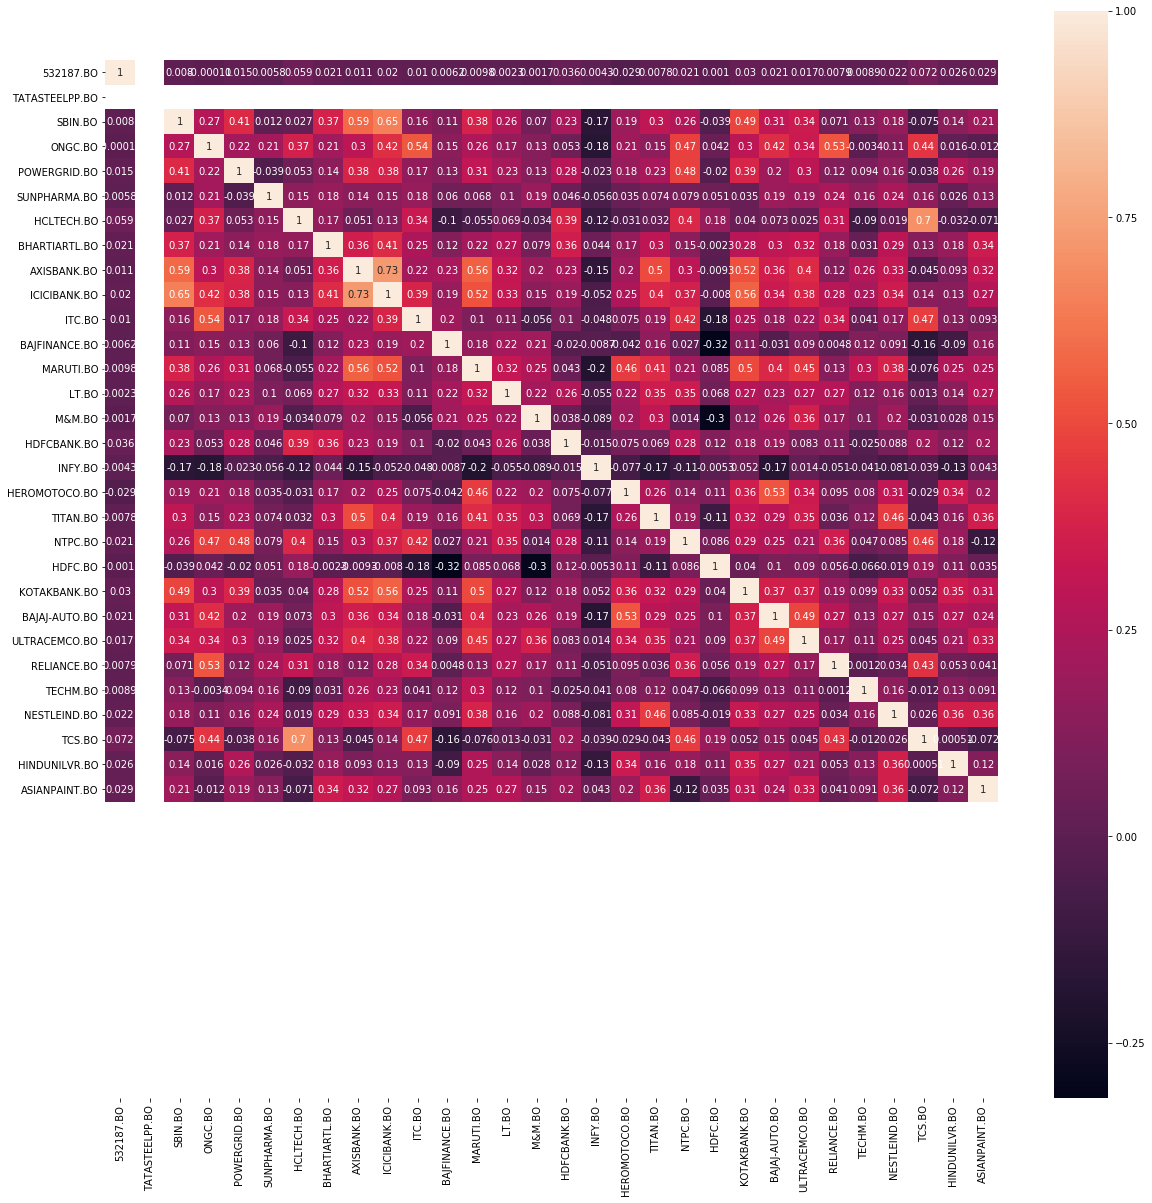

In [292]:
import seaborn as sns
df=df.fillna(0.0)
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,20))  
ax=sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 12.5, top - 2.5)

In [339]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
dataset=np.transpose(df)
dataset=dataset.loc[:, dataset.columns != '2009-12-31']
principalComponents = pca.fit_transform(dataset)
principalDf = pd.DataFrame(data = principalComponents )
#print(principalDf)
#print (pca.explained_variance_)
#print (pca.explained_variance_ratio_)
#print(pca.explained_variance_ratio_.cumsum())
from tabulate import tabulate
print(tabulate([['PC1', pca.explained_variance_[0]], 
                ['PC2', pca.explained_variance_ratio_.cumsum()[1]],
                ['PC3', pca.explained_variance_ratio_.cumsum()[2]],
                ['PC4', pca.explained_variance_ratio_.cumsum()[3]],
                ['PC5', pca.explained_variance_ratio_.cumsum()[4],]], 
               headers=['Principal Component', 'Variance Explained']))


Principal Component      Variance Explained
---------------------  --------------------
PC1                                3.60882
PC2                                0.786936
PC3                                0.847183
PC4                                0.886592
PC5                                0.909388


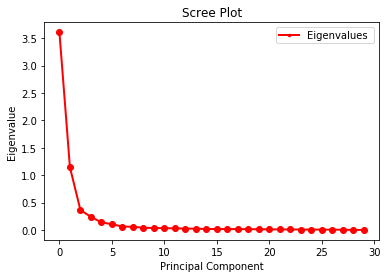

In [329]:
#print scree plot
num_vars = 30
eigvals = pca.explained_variance_
sing_vals = np.arange(num_vars) 
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
leg = plt.legend(['Eigenvalues '],  borderpad=0.3, shadow=False, markerscale=0.4)
plt.show()